<a href="https://colab.research.google.com/github/rishicarter/Code_dump/blob/main/Time_Series_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from tqdm import tqdm

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

In [2]:
plt.rcParams["figure.figsize"] = (10,7)

# Time Series

In [3]:
df = pd.read_csv('AirPassenger.csv', parse_dates=['Year-Month'],
                index_col=['Year-Month'])

In [4]:
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pax     144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [6]:
df['1949-01-01':'1949-03-01']

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


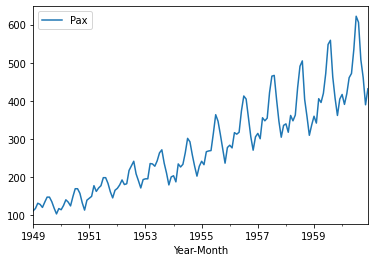

In [7]:
df.plot()
plt.show()

In [9]:
df_add_decompose = seasonal_decompose(df, model='additive', period=12)

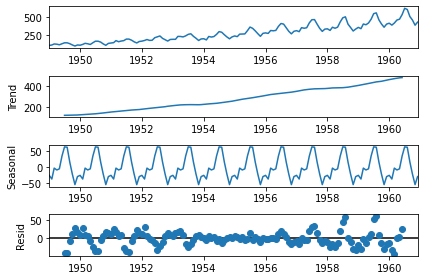

In [13]:
df_add_decompose.plot()
plt.show()

In [14]:
df_mul_decompose = seasonal_decompose(df, model='multiplicative', period=12)

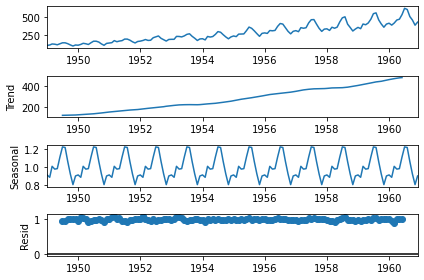

In [15]:
df_mul_decompose.plot()
plt.show()

In [16]:
abt = df.copy()
abt['Pax']=np.log(df)

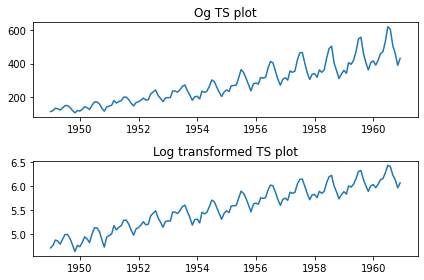

In [17]:
plt.subplot(2,1,1)
plt.title('Og TS plot')
plt.plot(df)

plt.subplot(2,1,2)
plt.title('Log transformed TS plot')
plt.plot(abt)
plt.tight_layout()



In [18]:
df1 = pd.read_csv('daily-total-female-births.csv',
                  parse_dates=['Date'], index_col='Date')
df1.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


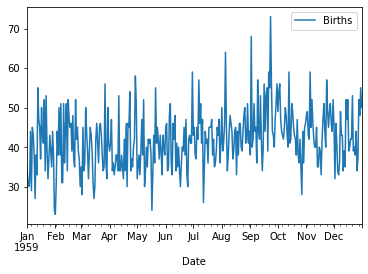

In [19]:
df1.plot()
plt.show()

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Births  365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


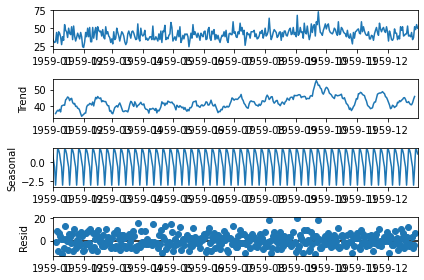

In [21]:
df1_add_decompose = seasonal_decompose(df1,
                                       model='additive')
df1_add_decompose.plot()
plt.show()

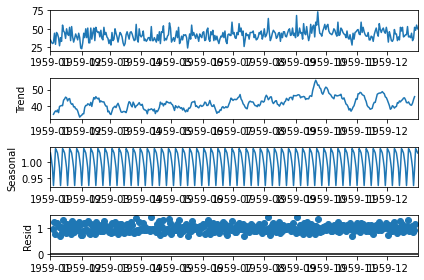

In [23]:
df1_mul_decompose = seasonal_decompose(df1,
                                       model='multiplicative')
df1_mul_decompose.plot()
plt.show()

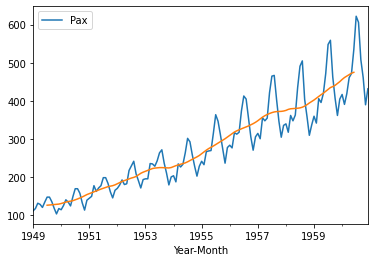

In [25]:
df.plot()
df_add_decompose.trend.plot()
plt.show()

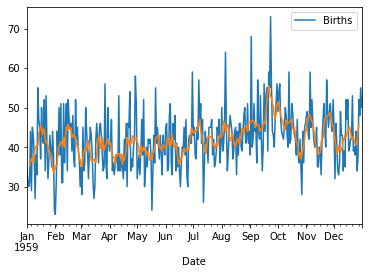

In [26]:
df1.plot()
df1_add_decompose.trend.plot()
plt.show()

In [27]:
df2 = pd.read_csv('monthly-beer-production-in-austr.csv', 
                  parse_dates=['Month'], index_col='Month')
df2.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


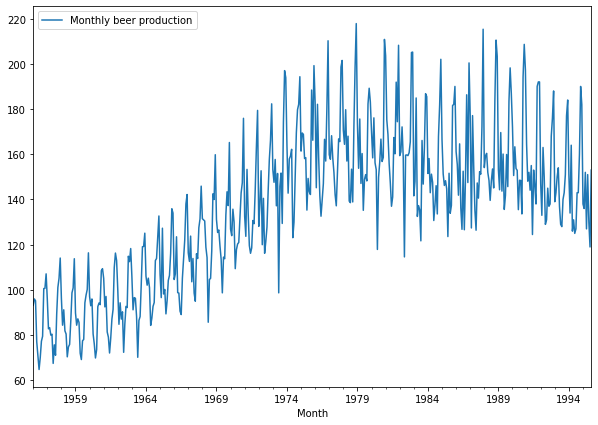

In [32]:
df2.plot(figsize=(10, 7))
plt.show()

In [43]:
df2.mean(), df2.median()

(Monthly beer production    136.395378
 dtype: float64, Monthly beer production    139.15
 dtype: float64)

In [56]:
df2['1956']

<ipython-input-56-e796ccb982e8>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df2['1956']


,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9
1956-06-01,64.8
1956-07-01,70.1
1956-08-01,77.3
1956-09-01,79.5


In [65]:
df2.squeeze().head()

Month
1956-01-01    93.2
1956-02-01    96.0
1956-03-01    95.2
1956-04-01    77.1
1956-05-01    70.9
Name: Monthly beer production, dtype: float64

In [67]:
df_1.head()

Month
1956-01-01    93.2
1956-02-01    96.0
1956-03-01    95.2
1956-04-01    77.1
1956-05-01    70.9
Name: Monthly beer production, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


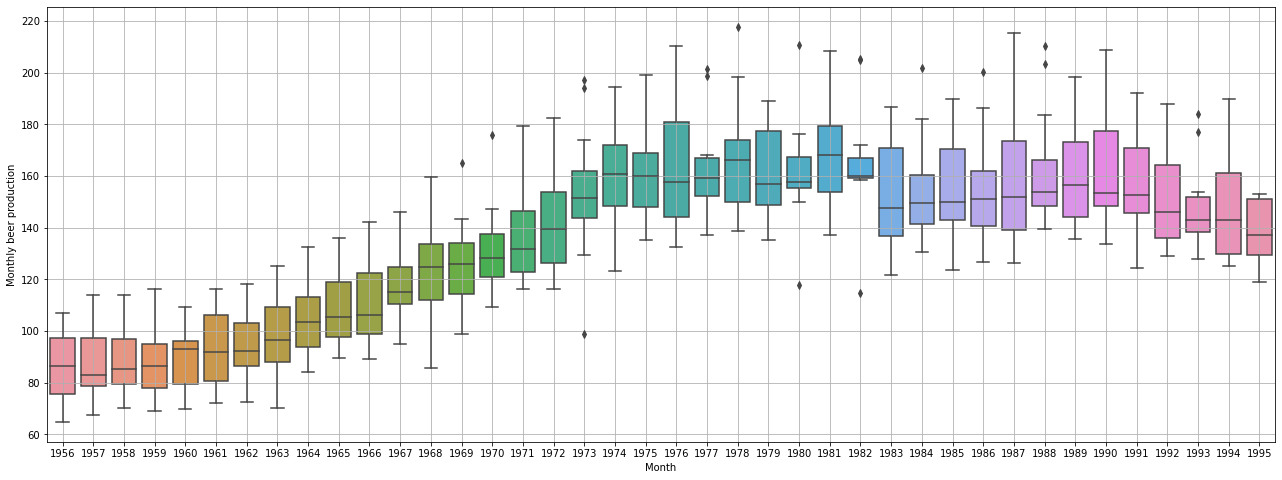

In [66]:
df_1 = pd.read_csv("monthly-beer-production-in-austr.csv",parse_dates=True,squeeze=True,index_col=0)
fig, ax=plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.year, df_1, ax=ax,whis=1.5)
plt.grid();


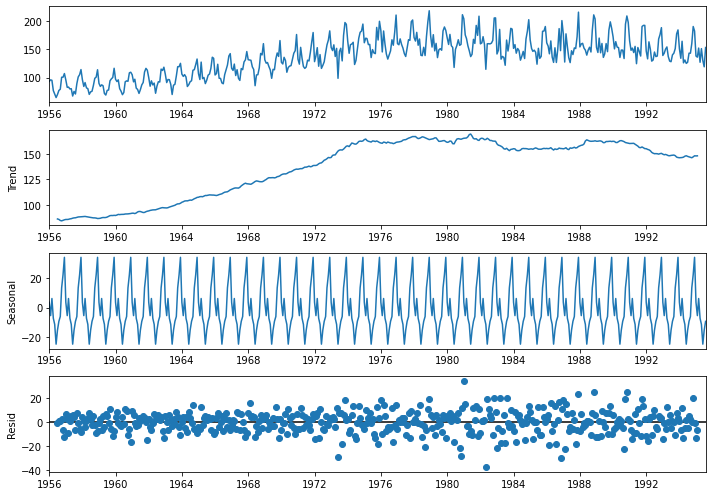

In [39]:
df2_add_decompose = seasonal_decompose(df2, model='additive')
df2_add_decompose.plot()
plt.show()

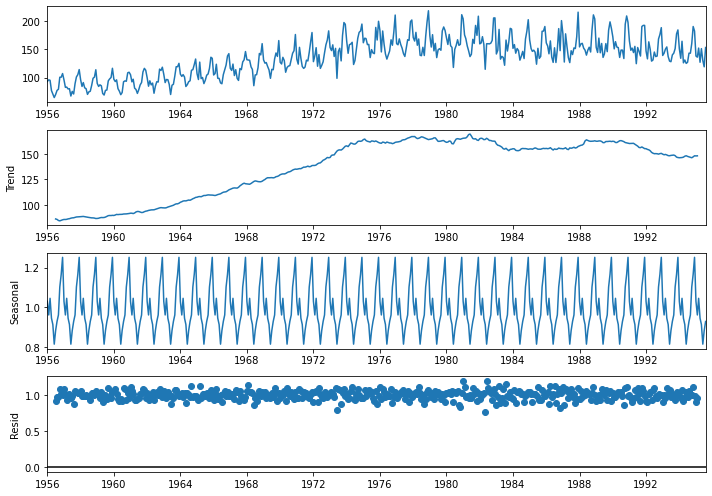

In [41]:
df2_mul_decompose = seasonal_decompose(df2, model='multiplicative')
df2_mul_decompose.plot()
plt.show()

In [68]:
df_fb = pd.read_csv('daily-total-female-births.csv')

In [69]:
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    365 non-null    object
 1   Births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [71]:
df_fb['Date'] = pd.date_range(start='1/1/1959', periods=len(df_fb), freq='D')

In [72]:
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   Births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [73]:
df_fb.set_index('Date', inplace=True)
df_fb.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [75]:
train,test=df_fb[:int(len(df_fb)*0.7)],df_fb[int(len(df_fb)*0.7):]
train.shape,test.shape

((255, 1), (110, 1))

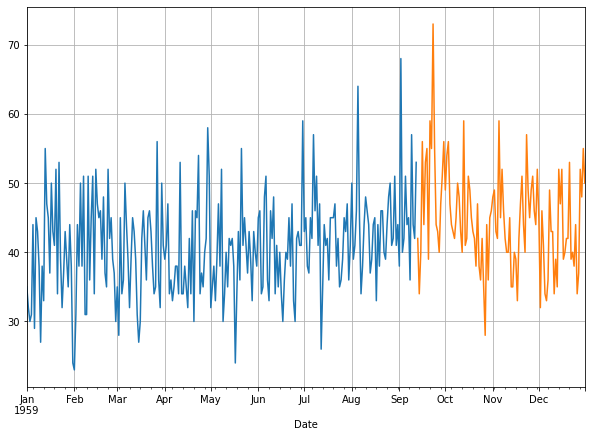

In [79]:
train.squeeze().plot()
test.squeeze().plot()
plt.grid()
plt.show()

In [80]:
df_ap = pd.read_csv('AirPassenger.csv', parse_dates=True, index_col='Year-Month')

In [81]:
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pax     144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [84]:
train, test = df_ap[df_ap.index<='1957'], df_ap[df_ap.index>'1957']
df_ap.shape, train.shape, test.shape

((144, 1), (97, 1), (47, 1))

In [85]:
train.tail()

,Pax
Year-Month,
1956-09-01,355
1956-10-01,306
1956-11-01,271
1956-12-01,306
1957-01-01,315


In [86]:
test.head()

,Pax
Year-Month,
1957-02-01,301
1957-03-01,356
1957-04-01,348
1957-05-01,355
1957-06-01,422


In [88]:
model_SES = SimpleExpSmoothing(train, initialization_method='estimated')

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [89]:
model_SES_autofit = model_SES.fit(optimized=True)

In [90]:
model_SES_autofit.params

{'smoothing_level': 0.9999999850970092,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 111.9998320543273,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [93]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1957-02-01    315.0
1957-03-01    315.0
1957-04-01    315.0
1957-05-01    315.0
1957-06-01    315.0
1957-07-01    315.0
1957-08-01    315.0
1957-09-01    315.0
1957-10-01    315.0
1957-11-01    315.0
1957-12-01    315.0
1958-01-01    315.0
1958-02-01    315.0
1958-03-01    315.0
1958-04-01    315.0
1958-05-01    315.0
1958-06-01    315.0
1958-07-01    315.0
1958-08-01    315.0
1958-09-01    315.0
1958-10-01    315.0
1958-11-01    315.0
1958-12-01    315.0
1959-01-01    315.0
1959-02-01    315.0
1959-03-01    315.0
1959-04-01    315.0
1959-05-01    315.0
1959-06-01    315.0
1959-07-01    315.0
1959-08-01    315.0
1959-09-01    315.0
1959-10-01    315.0
1959-11-01    315.0
1959-12-01    315.0
1960-01-01    315.0
1960-02-01    315.0
1960-03-01    315.0
1960-04-01    315.0
1960-05-01    315.0
1960-06-01    315.0
1960-07-01    315.0
1960-08-01    315.0
1960-09-01    315.0
1960-10-01    315.0
1960-11-01    315.0
1960-12-01    315.0
Freq: MS, dtype: float64

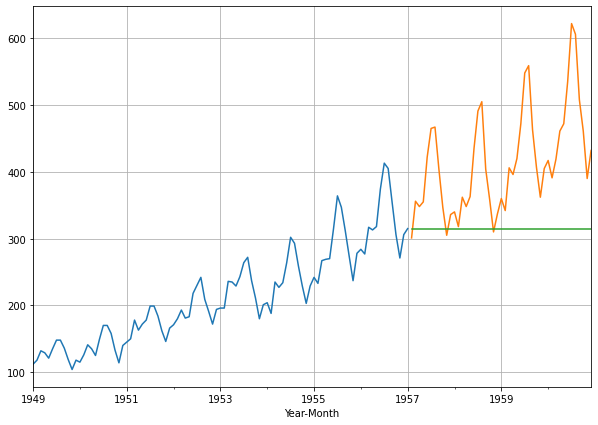

In [97]:
train.squeeze().plot()
test.squeeze().plot()
SES_predict.plot()
plt.grid()
plt.show()

In [101]:
SES_rmse = mean_squared_error(test.values, SES_predict.values, squared=False)

In [102]:
SES_rmse

126.75365631287177

In [103]:
model_H = Holt(train, initialization_method='estimated')
model_H_params = model_H.fit()
model_H_autofit = model_H.fit(optimized=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [104]:
model_H_params.params,model_H_autofit.params

({'smoothing_level': 0.995,
  'smoothing_trend': 0.0001,
  'smoothing_seasonal': nan,
  'damping_trend': nan,
  'initial_level': 118.46666666666661,
  'initial_trend': 2.0606060606060677,
  'initial_seasons': array([], dtype=float64),
  'use_boxcox': False,
  'lamda': None,
  'remove_bias': False},
 {'smoothing_level': 0.995,
  'smoothing_trend': 0.0001,
  'smoothing_seasonal': nan,
  'damping_trend': nan,
  'initial_level': 118.46666666666661,
  'initial_trend': 2.0606060606060677,
  'initial_seasons': array([], dtype=float64),
  'use_boxcox': False,
  'lamda': None,
  'remove_bias': False})

In [106]:
DES_predict = model_H_params.forecast(steps=len(test))
DES_predict

1957-02-01    317.024751
1957-03-01    319.085024
1957-04-01    321.145296
1957-05-01    323.205569
1957-06-01    325.265841
1957-07-01    327.326113
1957-08-01    329.386386
1957-09-01    331.446658
1957-10-01    333.506931
1957-11-01    335.567203
1957-12-01    337.627476
1958-01-01    339.687748
1958-02-01    341.748021
1958-03-01    343.808293
1958-04-01    345.868565
1958-05-01    347.928838
1958-06-01    349.989110
1958-07-01    352.049383
1958-08-01    354.109655
1958-09-01    356.169928
1958-10-01    358.230200
1958-11-01    360.290472
1958-12-01    362.350745
1959-01-01    364.411017
1959-02-01    366.471290
1959-03-01    368.531562
1959-04-01    370.591835
1959-05-01    372.652107
1959-06-01    374.712379
1959-07-01    376.772652
1959-08-01    378.832924
1959-09-01    380.893197
1959-10-01    382.953469
1959-11-01    385.013742
1959-12-01    387.074014
1960-01-01    389.134286
1960-02-01    391.194559
1960-03-01    393.254831
1960-04-01    395.315104
1960-05-01    397.375376


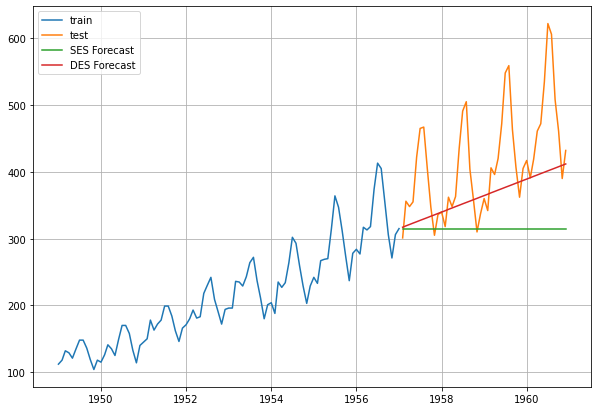

In [108]:
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.plot(SES_predict, label='SES Forecast')
plt.plot(DES_predict, label='DES Forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [110]:
DES_rmse = mean_squared_error(test, DES_predict, squared=False)
DES_rmse

83.8725094644908

In [124]:
model_ES_additive = ExponentialSmoothing(train, trend='additive',
                                         seasonal='additive',
                                         initialization_method='estimated')
model_ES_multi = ExponentialSmoothing(train, trend='additive',
                                         seasonal='multiplicative',
                                         initialization_method='estimated')

model_ESA_params, model_ESM_params= model_ES_additive.fit(optimized=True), model_ES_multi.fit(optimized=True)

In [125]:
model_ESA_params.params, model_ESM_params.params

({'smoothing_level': 0.2545061904847956,
  'smoothing_trend': 0.0,
  'smoothing_seasonal': 0.7454938095152044,
  'damping_trend': nan,
  'initial_level': 118.80841360794642,
  'initial_trend': 2.3184366642168595,
  'initial_seasons': array([ -9.12681105,  -3.52686702,   8.95077224,   3.68421298,
          -5.07476701,   9.0306235 ,  21.24972216,  18.82911458,
           4.7024483 , -14.09960998, -28.54136237, -11.93871544]),
  'use_boxcox': False,
  'lamda': None,
  'remove_bias': False},
 {'smoothing_level': 0.7406776758084399,
  'smoothing_trend': 0.0,
  'smoothing_seasonal': 0.0,
  'damping_trend': nan,
  'initial_level': 126.86138902448542,
  'initial_trend': 2.3485184965906254,
  'initial_seasons': array([0.87599774, 0.85668957, 0.98188197, 0.94870318, 0.94236831,
         1.06301595, 1.17474877, 1.14955438, 1.01027953, 0.87757361,
         0.7626858 , 0.86220521]),
  'use_boxcox': False,
  'lamda': None,
  'remove_bias': False})

In [115]:
ESA_predict, ESM_predict = model_ESA_params.forecast(steps=len(test)),\
model_ESM_params.forecast(steps=len(test))

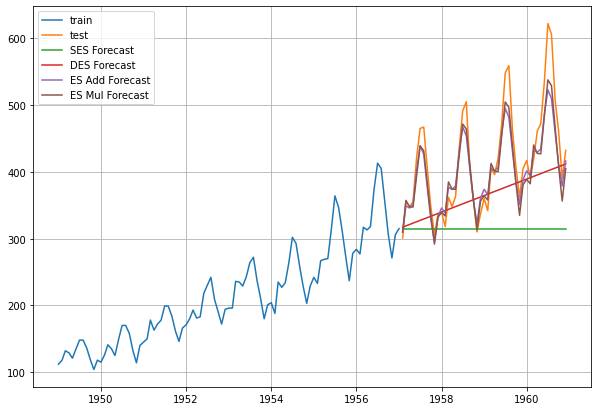

In [116]:
plt.plot(train, label='train')
plt.plot(test, label='test')
plt.plot(SES_predict, label='SES Forecast')
plt.plot(DES_predict, label='DES Forecast')
plt.plot(ESA_predict, label='ES Add Forecast')
plt.plot(ESM_predict, label='ES Mul Forecast')
plt.legend(loc='best')
plt.grid()
plt.show()

In [117]:
ESA_rmse, ESM_rmse = mean_squared_error(test.values,ESA_predict.values,squared=False),\
mean_squared_error(test.values, ESM_predict, squared=False)

In [118]:
ESA_rmse

32.93472392625769

In [119]:
ESM_rmse

30.48004148588378

# Day2

In [38]:
df_ms = pd.read_csv('monthly_sales.csv')#, parse_dates=True, index_col='Month')
df_ms.head()

,Month,Sales
0,Jan-13,454904
1,Feb-13,459417
2,Mar-13,617382
3,Apr-13,682274
4,May-13,763242


In [39]:
df_ms.describe()

,Sales
count,6.000000e+01
mean,7.950752e+05
std,1.729018e+05
min,4.549040e+05
25%,6.617050e+05
50%,7.990180e+05
75%,9.220262e+05
max,1.171393e+06


In [40]:
df_ms['date']=pd.date_range(start='1/1/2013',end='1/1/2018', freq='M')
df_ms.head()

,Month,Sales,date
0,Jan-13,454904,2013-01-31
1,Feb-13,459417,2013-02-28
2,Mar-13,617382,2013-03-31
3,Apr-13,682274,2013-04-30
4,May-13,763242,2013-05-31


In [41]:
df_ms.drop('Month', axis=1, inplace=True)
df_ms.head()

,Sales,date
0,454904,2013-01-31
1,459417,2013-02-28
2,617382,2013-03-31
3,682274,2013-04-30
4,763242,2013-05-31


In [42]:
df_ms['date']=pd.to_datetime(df_ms['date'])

In [43]:
df_ms.set_index('date', drop=True, inplace=True)
df_ms.head()

,Sales
date,
2013-01-31,454904
2013-02-28,459417
2013-03-31,617382
2013-04-30,682274
2013-05-31,763242


In [45]:
df_ms.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2013-01-31 to 2017-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


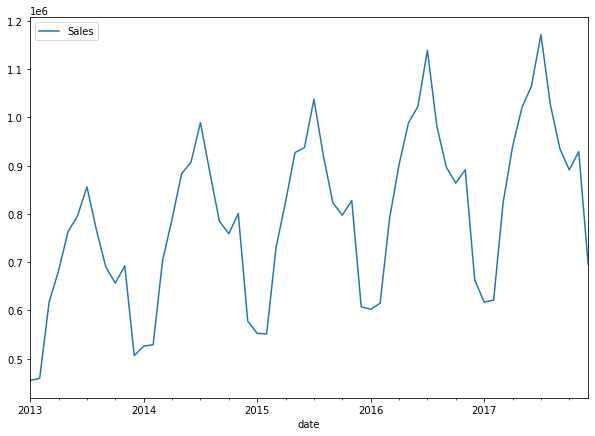

In [46]:
df_ms.plot()

In [47]:
round(df_ms.describe(),3)

,Sales
count,60.000
mean,795075.200
std,172901.778
min,454904.000
25%,661705.000
50%,799018.000
75%,922026.250
max,1171393.000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


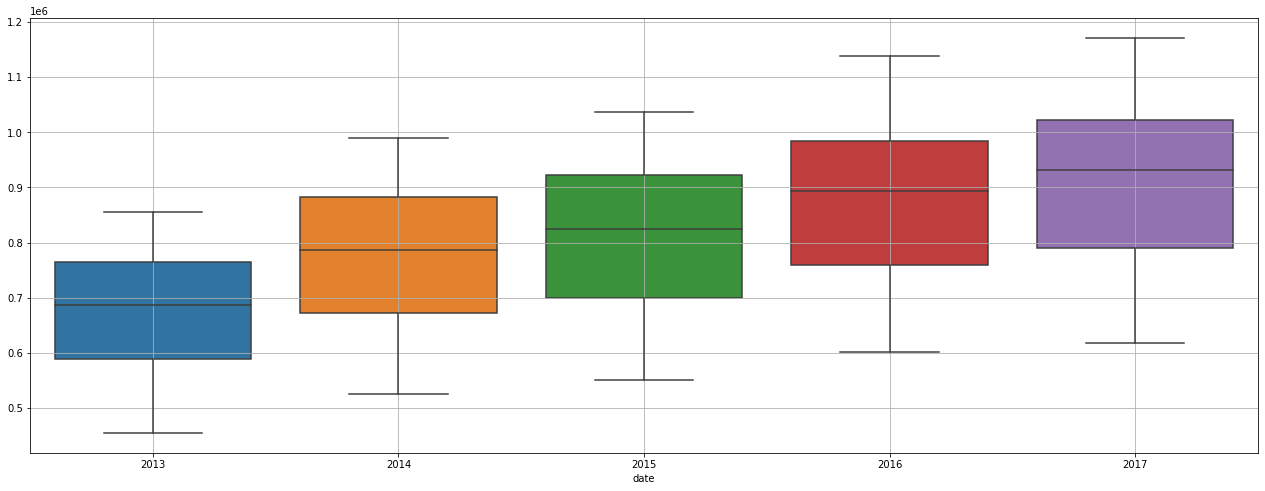

In [52]:
fig,ax=plt.subplots(figsize=(22,8))
# df_ms=df_ms.squeeze()
sns.boxplot(df_ms.index.year, df_ms.Sales.values, ax=ax)
plt.grid()

In [60]:
df_ms_pivot=df_ms.pivot_table(columns=df_ms.index.month_name(), index=df_ms.index.year,
                              values=['Sales'])
df_ms_pivot

Sales                                                               \
date   April   August December February January     July     June   March   
date                                                                        
2013  682274   766761   506607   459417  454904   855922   795597  617382   
2014  788914   885596   578048   529117  525987   989010   906842  704301   
2015  824467   920401   607572   551317  552513  1037350   937184  730951   
2016  901950   981494   663411   614957  602439  1138718  1022664  790881   
2017  938862  1026403   695170   621369  617306  1171393  1064624  822667   

                                          
date      May November October September  
date                                      
2013   763242   692643  656587    689907  
2014   882877   800783  758883    785124  
2015   926902   827645  797253    823332  
2016   988730   891448  863637    896831  
2017  1020686   928837  891160    935263

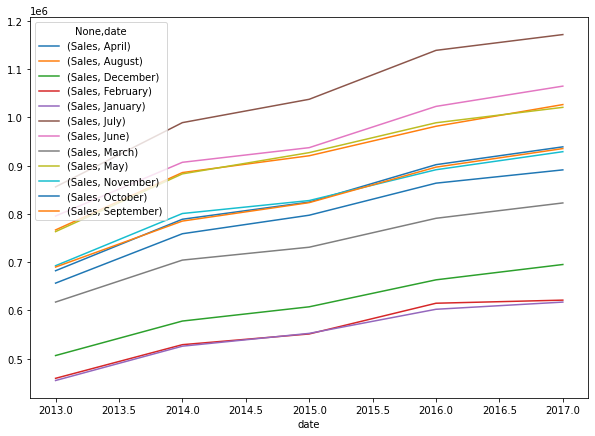

In [61]:
df_ms_pivot.plot()

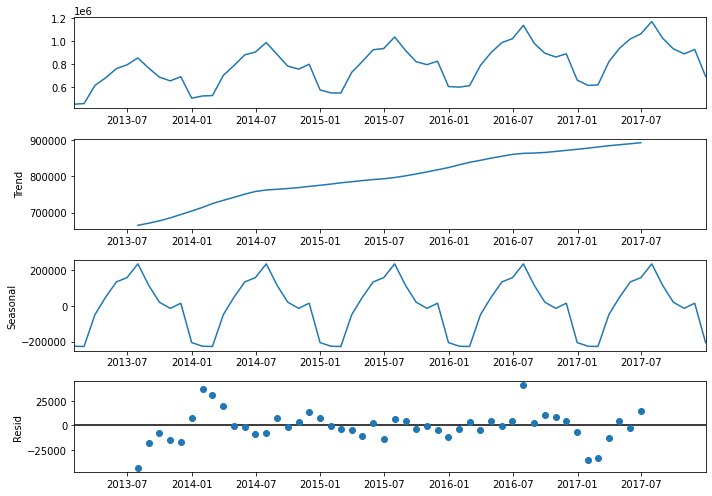

In [62]:
df_ms_decompose = seasonal_decompose(df_ms)
df_ms_decompose.plot()
plt.show()

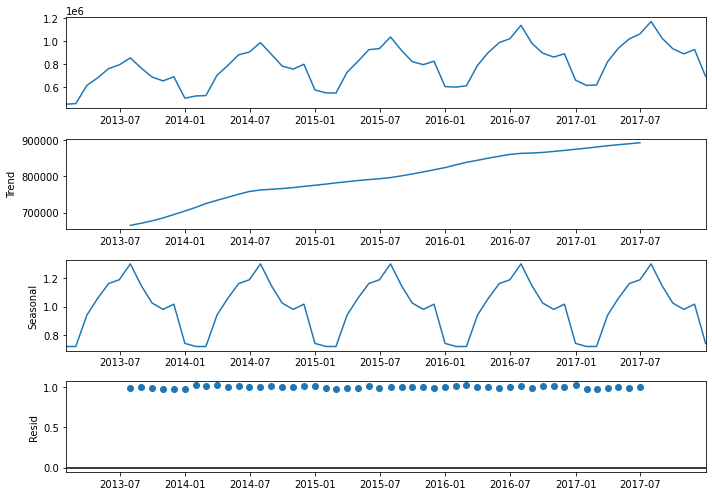

In [63]:
df_ms_decompose2 = seasonal_decompose(df_ms, model='multiplicative')
df_ms_decompose2.plot()
plt.show()

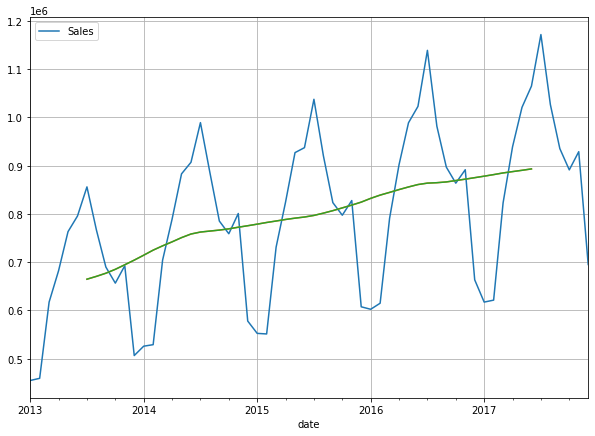

In [64]:
df_ms.plot()
df_ms_decompose.trend.plot()
df_ms_decompose2.trend.plot()
plt.grid()
plt.show()

In [65]:
train, test= df_ms[:int(len(df_ms)*0.7)],df_ms[int(len(df_ms)*0.7):]
train.shape, test.shape

((42, 1), (18, 1))

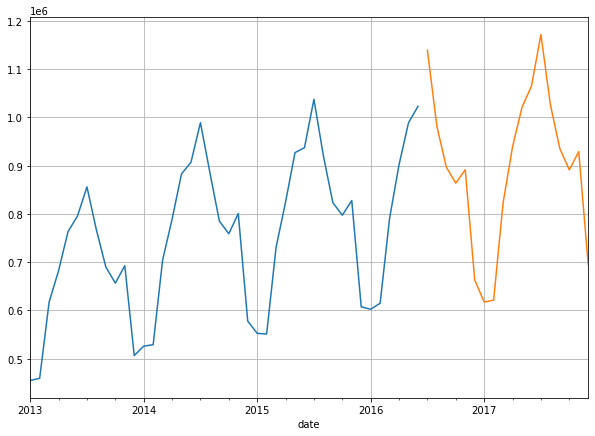

In [68]:
train.Sales.plot()
test.Sales.plot()
plt.grid()
plt.show()

In [70]:
model_ES = SimpleExpSmoothing(train, initialization_method='estimated')
model_ES_autofit = model_ES.fit(optimized=True)
ES_preds = model_ES_autofit.forecast(steps=len(test))
ES_rmse=mean_squared_error(test.values,ES_preds.values,squared=False)
ES_rmse

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


202629.8957845709

In [71]:
model_DES = Holt(train, initialization_method='estimated')
model_DES_autofit = model_DES.fit(optimized=True)
DES_preds = model_DES_autofit.forecast(steps=len(test))
DES_rmse=mean_squared_error(test.values,DES_preds.values,squared=False)
DES_rmse

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


450872.1661459682

In [72]:
model_ES_add = ExponentialSmoothing(train, trend='add',
                                    seasonal='add', initialization_method='estimated')
model_ESadd_autofit = model_ES_add.fit(optimized=True)
ESadd_preds = model_ESadd_autofit.forecast(steps=len(test))
ESadd_rmse=mean_squared_error(test.values,ESadd_preds.values,squared=False)
ESadd_rmse

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


59003.84473427644

In [73]:
model_ES_mul = ExponentialSmoothing(train, trend='add',
                                    seasonal='mul', initialization_method='estimated')
model_ESmul_autofit = model_ES_mul.fit(optimized=True)
ESmul_preds = model_ESmul_autofit.forecast(steps=len(test))
ESmul_rmse=mean_squared_error(test.values,ESmul_preds.values,squared=False)
ESmul_rmse

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


24327.78760301362

In [74]:
print(ES_rmse,DES_rmse,ESadd_rmse,ESmul_rmse)

202629.8957845709 450872.1661459682 59003.84473427644 24327.78760301362


In [75]:
model_ESmul_autofit.params

{'smoothing_level': 0.6414285714285715,
 'smoothing_trend': 0.08366459627329192,
 'smoothing_seasonal': 9.999999999999999e-05,
 'damping_trend': nan,
 'initial_level': 652009.7166666663,
 'initial_trend': 8938.665151515175,
 'initial_seasons': array([0.72353098, 0.71801871, 0.94616888, 1.0553796 , 1.17479492,
        1.18955302, 1.29361436, 1.15201004, 1.02255034, 0.97340788,
        1.01790548, 0.73306578]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [79]:
model_ES_mul = ExponentialSmoothing(train, trend='add',
                                    seasonal='mul', initialization_method='estimated')
model_ESmul_params = model_ES_mul.fit(smoothing_level=0.676,smoothing_trend=0.088,
                                      smoothing_seasonal=0.323)
ESmul_preds = model_ESmul_params.forecast(steps=len(test))
ESmul_rmse2=mean_squared_error(test.values,ESmul_preds.values,squared=False)
ESmul_rmse2

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


22082.85979254923

In [80]:
print(ES_rmse,DES_rmse,ESadd_rmse,ESmul_rmse,ESmul_rmse2)

202629.8957845709 450872.1661459682 59003.84473427644 24327.78760301362 22082.85979254923


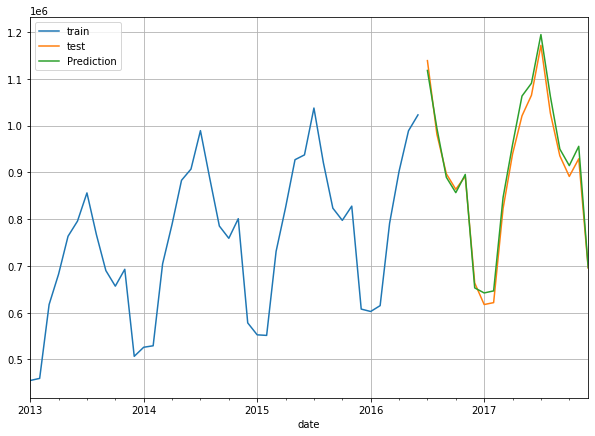

In [83]:
train.Sales.plot()
test.Sales.plot()
ESmul_preds.plot()
plt.grid()
plt.legend(['train','test','Prediction'])
plt.show()

In [89]:
train_yearly = train.resample('Y').sum()

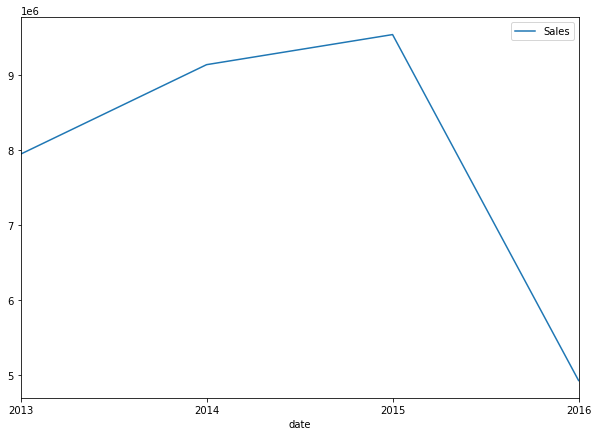

In [90]:
train_yearly.plot()

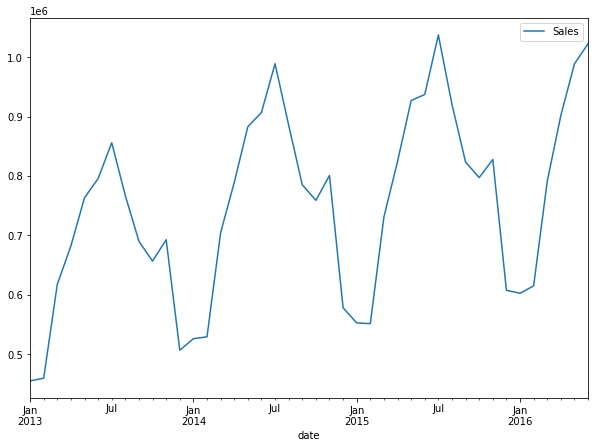

In [91]:
train.plot()

In [92]:
train_daily = train.resample('D').interpolate()

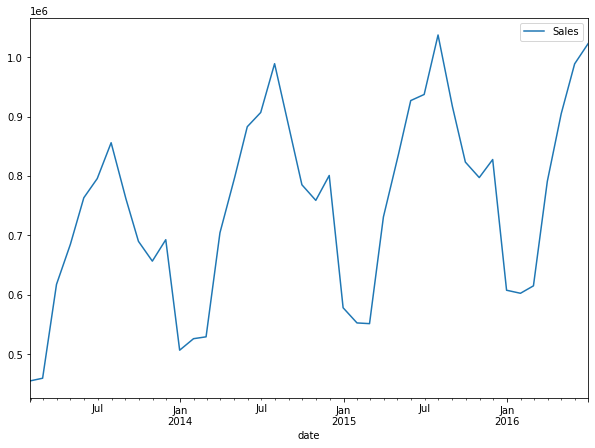

In [93]:
train_daily.plot()

In [95]:
train.shape

(42, 1)

In [181]:
df_ms.shape

(60, 1)

In [182]:
dftest=adfuller(df_ms,regression='ct')
dftest

(-2.063704912471544,
 0.5663513977053367,
 11,
 48,
 {'1%': -4.160927854094329,
  '5%': -3.5062888245081014,
  '10%': -3.1828225911458334},
 1114.7597894407452)

In [186]:
dftest=adfuller(df_ms.diff().dropna(),regression='ct')
dftest

(-1.886600586367773,
 0.661583971124633,
 11,
 47,
 {'1%': -4.16555047157181,
  '5%': -3.508430336919565,
  '10%': -3.184055147221714},
 1054.4074108187383)

In [185]:
dftest=adfuller(df_ms.diff().diff().dropna(),regression='ct')
dftest

(-37.59135121795117,
 0.0,
 10,
 47,
 {'1%': -4.16555047157181,
  '5%': -3.508430336919565,
  '10%': -3.184055147221714},
 1036.153185845922)

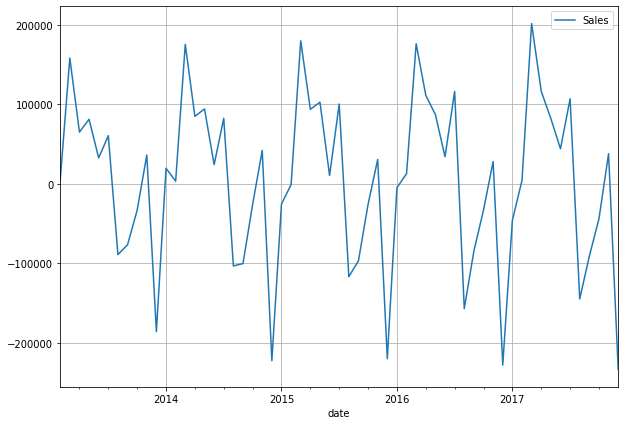

In [102]:
df_ms.diff().dropna().plot(grid=True)

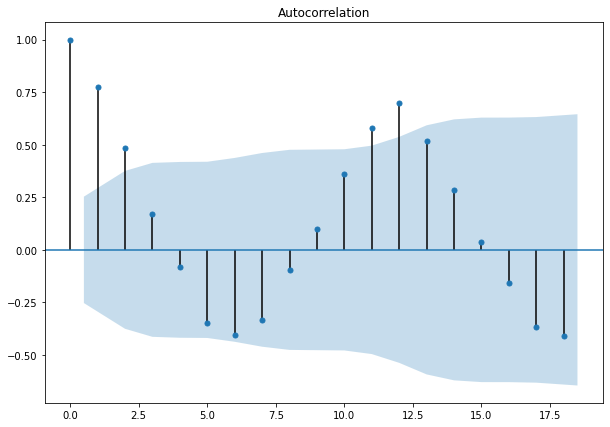

In [110]:
plot_acf(df_ms);

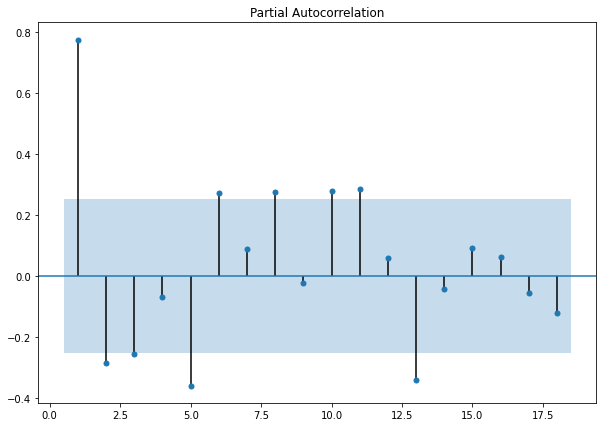

In [112]:
plot_pacf(df_ms, zero=False, method='ywmle');

In [113]:
# d=2,q=2,p=3
df_ms.index.year

Int64Index([2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
            2013, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
            2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
            2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='date')

In [115]:
train, test= df_ms[:int(len(df_ms)*0.7)],df_ms[int(len(df_ms)*0.7):]
train.shape, test.shape

((42, 1), (18, 1))

In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2013-01-31 to 2016-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   42 non-null     int64
dtypes: int64(1)
memory usage: 672.0 bytes


In [166]:
p=q=range(0,4)
d=range(2,3)
pdq=list(itertools.product(p,d,q))
for i in range(0,len(pdq)):
  print(pdq[i])

(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)
(2, 2, 0)
(2, 2, 1)
(2, 2, 2)
(2, 2, 3)
(3, 2, 0)
(3, 2, 1)
(3, 2, 2)
(3, 2, 3)


In [167]:
# Lower the Akaike Information Criteria
ARIMA_AIC = pd.DataFrame(columns=['param','AIC'])

In [168]:
for param in pdq:
  ARIMA_model = ARIMA(train.Sales.values, order=param).fit()
  print(f'ARIMA{param} - AIC:{ARIMA_model.aic}')
  ARIMA_AIC=ARIMA_AIC.append({'param':param,
                              'AIC':ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 2, 0) - AIC:1053.6710993871875
ARIMA(0, 2, 1) - AIC:1043.753996858195
ARIMA(0, 2, 2) - AIC:1047.6825800646207
ARIMA(0, 2, 3) - AIC:1045.4787592250755
ARIMA(1, 2, 0) - AIC:1043.7533703967956
ARIMA(1, 2, 1) - AIC:1045.5309500595922
ARIMA(1, 2, 2) - AIC:1036.639198107345


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 2, 3) - AIC:1034.1474986679727
ARIMA(2, 2, 0) - AIC:1045.7650399937017
ARIMA(2, 2, 1) - AIC:1042.692256820118
ARIMA(2, 2, 2) - AIC:1034.6142064422625
ARIMA(2, 2, 3) - AIC:1034.9566158570885
ARIMA(3, 2, 0) - AIC:1042.7694221529887
ARIMA(3, 2, 1) - AIC:1035.6326566646408
ARIMA(3, 2, 2) - AIC:1034.215075458892
ARIMA(3, 2, 3) - AIC:1034.2392205313354


In [169]:
ARIMA_AIC.sort_values(by='AIC')

,param,AIC
7,"(1, 2, 3)",1034.147499
14,"(3, 2, 2)",1034.215075
15,"(3, 2, 3)",1034.239221
10,"(2, 2, 2)",1034.614206
11,"(2, 2, 3)",1034.956616
13,"(3, 2, 1)",1035.632657
6,"(1, 2, 2)",1036.639198
9,"(2, 2, 1)",1042.692257
12,"(3, 2, 0)",1042.769422
4,"(1, 2, 0)",1043.753370


In [170]:
ARIMA_best = ARIMA(train.Sales.values,order=(1, 2, 3)).fit()
print(ARIMA_best.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   42
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -512.074
Date:                Tue, 31 Jan 2023   AIC                           1034.147
Time:                        17:59:40   BIC                           1042.592
Sample:                             0   HQIC                          1037.201
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9968      0.020    -50.333      0.000      -1.036      -0.958
ma.L1          0.6041      0.197      3.066      0.002       0.218       0.990
ma.L2         -0.8924      0.312     -2.856      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


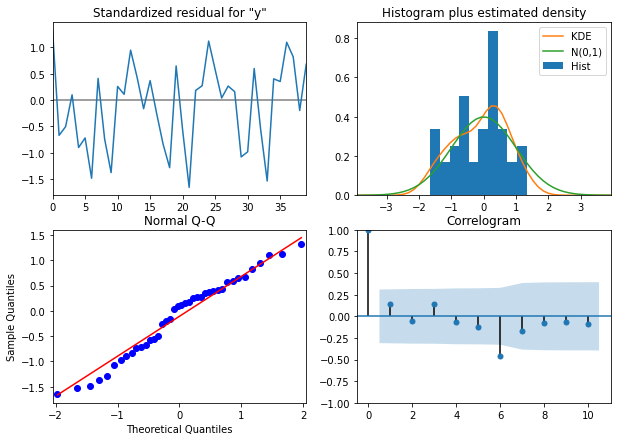

In [171]:
ARIMA_best.plot_diagnostics();

In [172]:
ARIMA_preds=ARIMA_best.forecast(steps=len(test))

In [173]:
ARIMA_rmse = mean_squared_error(test.values, ARIMA_preds, squared=False)

In [174]:
ARIMA_rmse

453793.4568525463

In [131]:
ARIMA_rmse

116579.02989579244

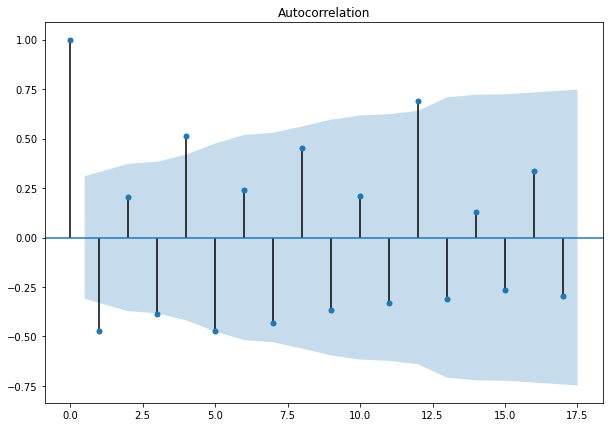

In [190]:
plot_acf(train.diff().diff().dropna());

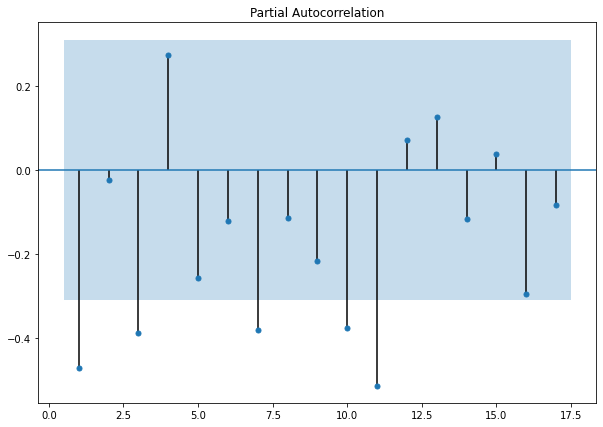

In [188]:
plot_pacf(train.diff().diff().dropna(), zero=False, method='ywmle');

In [177]:
ARIMA_try = ARIMA(train.Sales,order=(1, 2, 1)).fit()
print(ARIMA_try.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -519.765
Date:                Tue, 31 Jan 2023   AIC                           1045.531
Time:                        18:00:56   BIC                           1050.598
Sample:                    01-31-2013   HQIC                          1047.363
                         - 06-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1347      0.493     -0.273      0.785      -1.100       0.831
ma.L1         -0.4111      0.515     -0.798      0.425      -1.421       0.598
sigma2      1.247e+10   6.37e-11   1.96e+20      0.0

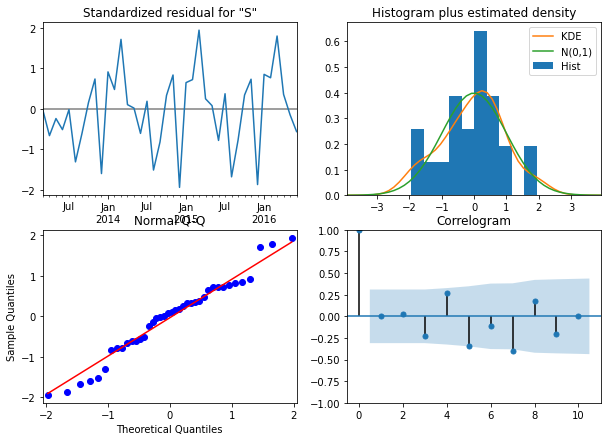

In [178]:
ARIMA_try.plot_diagnostics();

In [179]:
ARIMA_try_preds=ARIMA_try.forecast(steps=len(test))
ARIMA_try_rmse = mean_squared_error(test.values, ARIMA_try_preds, squared=False)

In [180]:
ARIMA_try_rmse

811114.8922675654

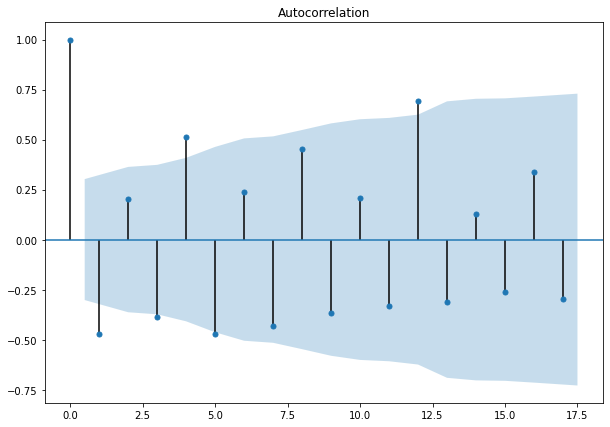

In [195]:
plot_acf(train.diff().diff(), missing='drop');

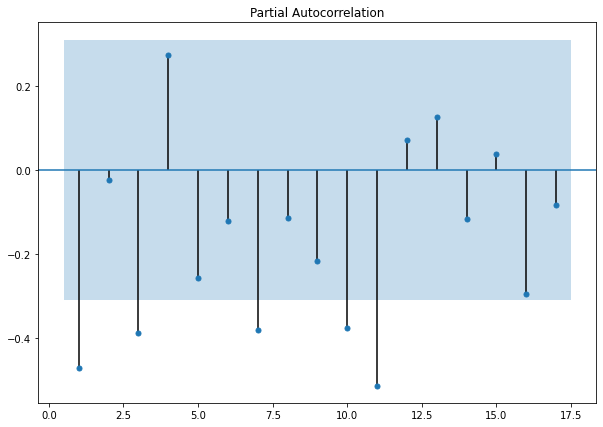

In [199]:
plot_pacf(train.diff().diff().dropna(), zero=False, method='ywmle');

In [224]:
p=q=range(0,4)
d=range(1,2)
D=range(0,1)
pdq=list(itertools.product(p,d,q))
PDQ=[(x[0],x[1],x[2],8) for x in list(itertools.product(p,D,q))]
for i in range(1,len(pdq)):
  print(f'Model: pdq={pdq[i]}\tPDQ={PDQ[i]}')

Model: pdq=(0, 1, 1)	PDQ=(0, 0, 1, 8)
Model: pdq=(0, 1, 2)	PDQ=(0, 0, 2, 8)
Model: pdq=(0, 1, 3)	PDQ=(0, 0, 3, 8)
Model: pdq=(1, 1, 0)	PDQ=(1, 0, 0, 8)
Model: pdq=(1, 1, 1)	PDQ=(1, 0, 1, 8)
Model: pdq=(1, 1, 2)	PDQ=(1, 0, 2, 8)
Model: pdq=(1, 1, 3)	PDQ=(1, 0, 3, 8)
Model: pdq=(2, 1, 0)	PDQ=(2, 0, 0, 8)
Model: pdq=(2, 1, 1)	PDQ=(2, 0, 1, 8)
Model: pdq=(2, 1, 2)	PDQ=(2, 0, 2, 8)
Model: pdq=(2, 1, 3)	PDQ=(2, 0, 3, 8)
Model: pdq=(3, 1, 0)	PDQ=(3, 0, 0, 8)
Model: pdq=(3, 1, 1)	PDQ=(3, 0, 1, 8)
Model: pdq=(3, 1, 2)	PDQ=(3, 0, 2, 8)
Model: pdq=(3, 1, 3)	PDQ=(3, 0, 3, 8)


In [225]:
SARIMA_AIC=pd.DataFrame(columns=['param','seasonal','AIC'])

In [226]:
for param in tqdm(pdq):
  for param_seasonal in PDQ:
    SARIMA_model = sm.tsa.statespace.SARIMAX(train.Sales.values,
                                           order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
    results_SARIMA=SARIMA_model.fit(maxiter=1000)
    # print(f'SARIMA{param}x{param_seasonal} - AIC:{results_SARIMA.aic}')
    SARIMA_AIC=SARIMA_AIC.append({'param':param,
                                  'seasonal':param_seasonal,
                                  'AIC':results_SARIMA.aic}, ignore_index=True)

  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 69%|██████▉   | 11/16 [01:01<00:44,  8.88s/it]/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 81%|████████▏ | 13/16 [01:29<00:32, 10.80s/it]/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
100%|██████████| 16/16 [02:35<00:00,  9.72s/it]


In [227]:
SARIMA_AIC.sort_values(by='AIC').head(10)

,param,seasonal,AIC
179,"(2, 1, 3)","(0, 0, 3, 8)",336.270371
51,"(0, 1, 3)","(0, 0, 3, 8)",337.135263
115,"(1, 1, 3)","(0, 0, 3, 8)",337.508639
243,"(3, 1, 3)","(0, 0, 3, 8)",337.583508
183,"(2, 1, 3)","(1, 0, 3, 8)",338.145178
55,"(0, 1, 3)","(1, 0, 3, 8)",339.252124
119,"(1, 1, 3)","(1, 0, 3, 8)",339.518758
247,"(3, 1, 3)","(1, 0, 3, 8)",339.618791
187,"(2, 1, 3)","(2, 0, 3, 8)",340.138158
59,"(0, 1, 3)","(2, 0, 3, 8)",341.191365


In [228]:
SARIMA_best = sm.tsa.statespace.SARIMAX(train.Sales.values,
                                           order=(2, 1, 3),
                                           seasonal_order=(0, 0, 3, 8),
                                           enforce_invertibility=False)
results_SARIMA_best=SARIMA_model.fit(maxiter=1000)
print(results_SARIMA_best.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   42
Model:             SARIMAX(3, 1, 3)x(3, 0, 3, 8)   Log Likelihood                -158.836
Date:                           Tue, 31 Jan 2023   AIC                            343.672
Time:                                   19:50:30   BIC                            351.017
Sample:                                        0   HQIC                           342.163
                                            - 42                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2800    354.516     -0.001      0.999    -695.119     694.559
ar.L2          0.3717    216.055      0.002

In [229]:
results_SARIMA_best.plot_diagnostics(figsize=(15,12))

ValueError: ignored

<Figure size 1080x864 with 0 Axes>

In [230]:
SARIMA_preds = results_SARIMA_best.get_forecast(steps=len(test))
SARIMA_preds.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1.096870e+06,80380.677243,939326.586739,1.254413e+06
1,9.906187e+05,81265.059215,831342.091279,1.149895e+06
2,8.659533e+05,82034.811287,705168.001914,1.026739e+06
3,8.307307e+05,82771.468638,668501.609748,9.929598e+05
4,8.576256e+05,83076.841711,694798.007844,1.020453e+06


In [231]:
SARIMA_rmse=mean_squared_error(test.Sales,
                               SARIMA_preds.predicted_mean,
                               squared=False)

In [232]:
SARIMA_rmse

143280.41063638235

In [240]:
SARIMA_predictions=SARIMA_preds.summary_frame(alpha=0.05)
SARIMA_predictions.head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1.096870e+06,80380.677243,939326.586739,1.254413e+06
1,9.906187e+05,81265.059215,831342.091279,1.149895e+06
2,8.659533e+05,82034.811287,705168.001914,1.026739e+06
3,8.307307e+05,82771.468638,668501.609748,9.929598e+05
4,8.576256e+05,83076.841711,694798.007844,1.020453e+06


AttributeError: ignored

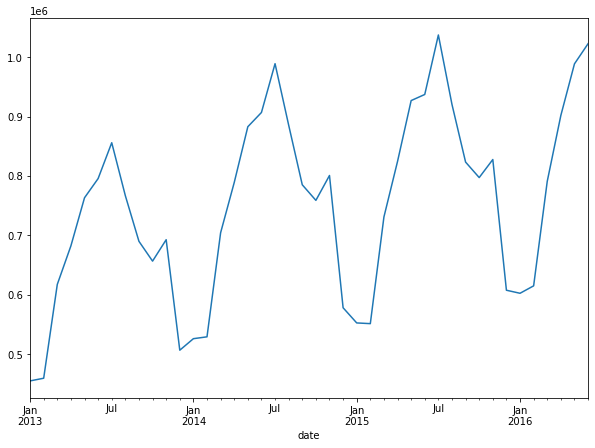

In [249]:
axis=train['Sales'].plot(label='Train')
ARIMA_preds.plot(ax=axis,label='Test',alpha=0.7)
plt.legend(loc='best')
plt.grid();

In [245]:
SARIMA_predictions['mean']

0     1.096870e+06
1     9.906187e+05
2     8.659533e+05
3     8.307307e+05
4     8.576256e+05
5     6.019195e+05
6     5.090625e+05
7     5.022590e+05
8     6.484529e+05
9     7.556705e+05
10    8.554884e+05
11    8.545879e+05
12    9.276316e+05
13    8.370669e+05
14    7.574659e+05
15    7.393256e+05
16    7.449936e+05
17    5.695497e+05
Name: mean, dtype: float64

In [248]:
ARIMA_preds

array([1124812.48634309, 1107609.11776414, 1172497.76833455,
       1155555.82201119, 1220183.88282587, 1203501.69640947,
       1267870.82452333, 1251446.74623586, 1315558.58816681,
       1299390.97673371, 1363247.16852968, 1347334.39311302,
       1410936.56041853, 1395277.00055065, 1458626.75867297,
       1443218.80419057, 1506317.75816544, 1491159.809144  ])

# Day 3

In [3]:
sales = pd.read_csv('Sales.csv')
sales.head(3)

,RetailSales
0,2585
1,3368
2,3210


In [4]:
sales.shape

(187, 1)

In [5]:
 sales['date']=pd.date_range(start='1/1/2000', end='8/1/2015',
                            freq='M')
 sales.head()

,RetailSales,date
0,2585,2000-01-31
1,3368,2000-02-29
2,3210,2000-03-31
3,3111,2000-04-30
4,3756,2000-05-31


In [6]:
sales.tail(10)

,RetailSales,date
177,2016,2014-10-31
178,2799,2014-11-30
179,2467,2014-12-31
180,1153,2015-01-31
181,1482,2015-02-28
182,1818,2015-03-31
183,2262,2015-04-30
184,2612,2015-05-31
185,2967,2015-06-30
186,3179,2015-07-31


In [6]:
sales.set_index('date', inplace=True)
sales.head()

,RetailSales
date,
2000-01-31,2585
2000-02-29,3368
2000-03-31,3210
2000-04-30,3111
2000-05-31,3756


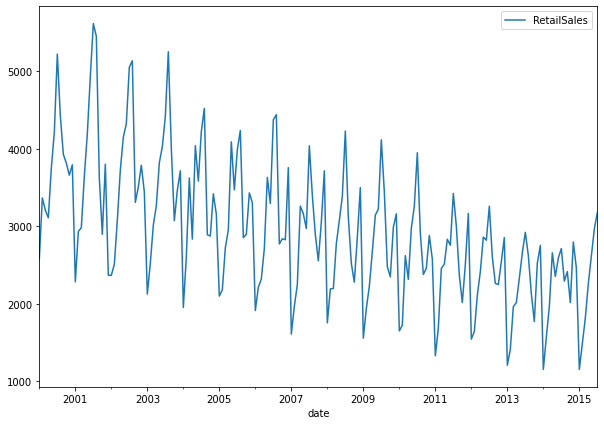

In [7]:
sales.plot()

In [18]:
sales.describe()

,RetailSales
count,187.000000
mean,2962.304813
std,878.968431
min,1153.000000
25%,2361.500000
50%,2876.000000
75%,3467.500000
max,5618.000000


In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 2000-01-31 to 2015-07-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   RetailSales  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


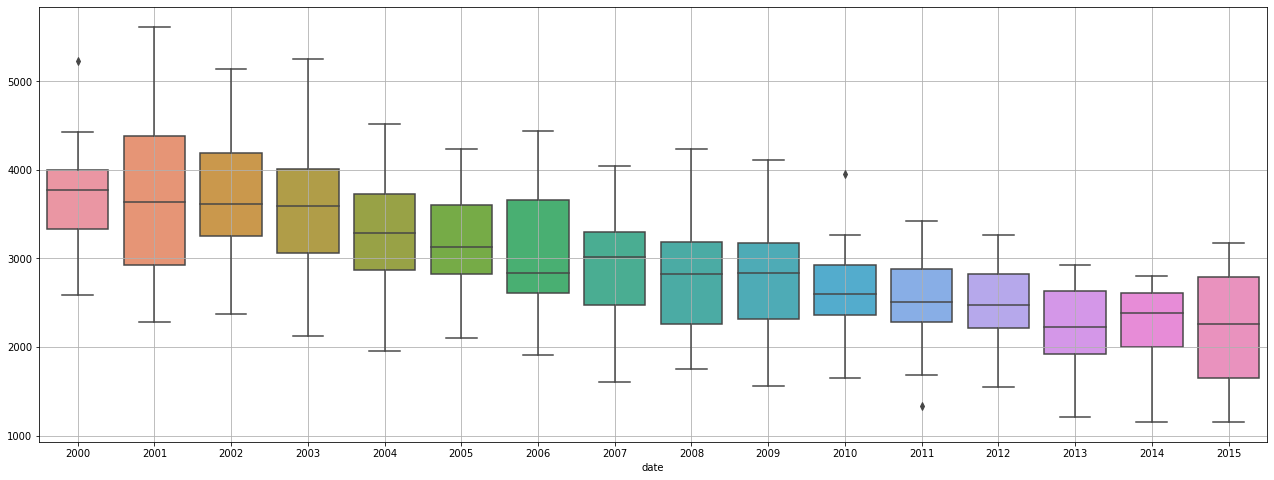

In [8]:
fig,ax=plt.subplots(figsize=(22,8))
sns.boxplot(x=sales.index.year,y=sales.RetailSales.values,
            ax=ax)
plt.grid()
plt.show();

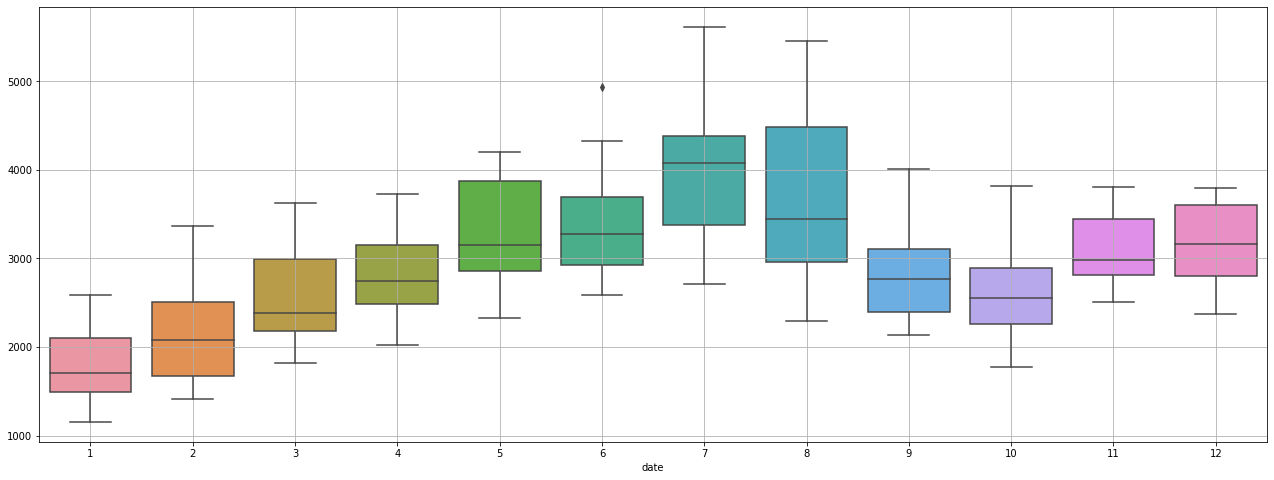

In [9]:
fig,ax=plt.subplots(figsize=(22,8))
sns.boxplot(x=sales.index.month,y=sales.RetailSales.values,
            ax=ax)
plt.grid()
plt.show();

In [10]:
sales_pivot = sales.pivot_table(index=sales.index.year, columns=sales.index.month_name(),
                                values=['RetailSales'])
sales_pivot

RetailSales                                                            \
date       April  August December February January    July    June   March   
date                                                                         
2000      3111.0  4426.0   3795.0   3368.0  2585.0  5225.0  4216.0  3210.0   
2001      3646.0  5454.0   2369.0   2934.0  2285.0  5618.0  4935.0  2985.0   
2002      3728.0  5138.0   3446.0   2511.0  2369.0  5054.0  4326.0  3079.0   
2003      3265.0  5255.0   3718.0   2523.0  2127.0  4420.0  4027.0  3017.0   
2004      2836.0  4523.0   3159.0   2604.0  1954.0  4225.0  3584.0  3626.0   
2005      2954.0  4239.0   3307.0   2181.0  2101.0  3990.0  3470.0  2724.0   
2006      2714.0  4442.0   3758.0   2214.0  1914.0  4377.0  3295.0  2320.0   
2007      3262.0  3402.0   3717.0   1968.0  1610.0  4041.0  2972.0  2248.0   
2008      2777.0  3118.0   3502.0   2193.0  1755.0  4231.0  3389.0  2198.0   
2009      2676.0  3446.0   3163.0   1940.0  1558.0  4117.0  3224.0  2226.0   
2010      2316.0  2917.0   2579.0   1725.0  1651.0  3951.0  3263.0  2622.0   
2011      2514.0  3006.0   3168.0   1686.0  1330.0  3425.0  2757.0  2457.0   
2012      2415.0  2606.0   2856.0   1643.0  1545.0  3260.0  2822.0  2112.0   
2013      2018.0  2626.0   2755.0   1412.0  1208.0  2923.0  2660.0  1964.0   
2014      2659.0  2294.0   2467.0   1568.0  1154.0  2714.0  2592.0  1965.0   
2015      2262.0     NaN      NaN   1482.0  1153.0  3179.0  2967.0  1818.0   

                                         
date     May November October September  
date                                     
2000  3756.0   3661.0  3816.0    3932.0  
2001  4198.0   3802.0  2898.0    3624.0  
2002  4151.0   3790.0  3508.0    3310.0  
2003  3822.0   3465.0  3074.0    4009.0  
2004  4042.0   3420.0  2876.0    2892.0  
2005  4092.0   3433.0  2897.0    2855.0  
2006  3633.0   2828.0  2840.0    2774.0  
2007  3164.0   3056.0  2555.0    2898.0  
2008  3076.0   2862.0  2280.0    2524.0  
2009  3145.0   2986.0  2349.0    2482.0  
2010  2976.0   2883.0  2458.0    2380.0  
2011  2834.0   2507.0  2017.0    2369.0  
2012  2862.0   2545.0  2250.0    2264.0  
2013  2329.0   2526.0  1772.0    2132.0  
2014  2354.0   2799.0  2016.0    2416.0  
2015  2612.0      NaN     NaN       NaN

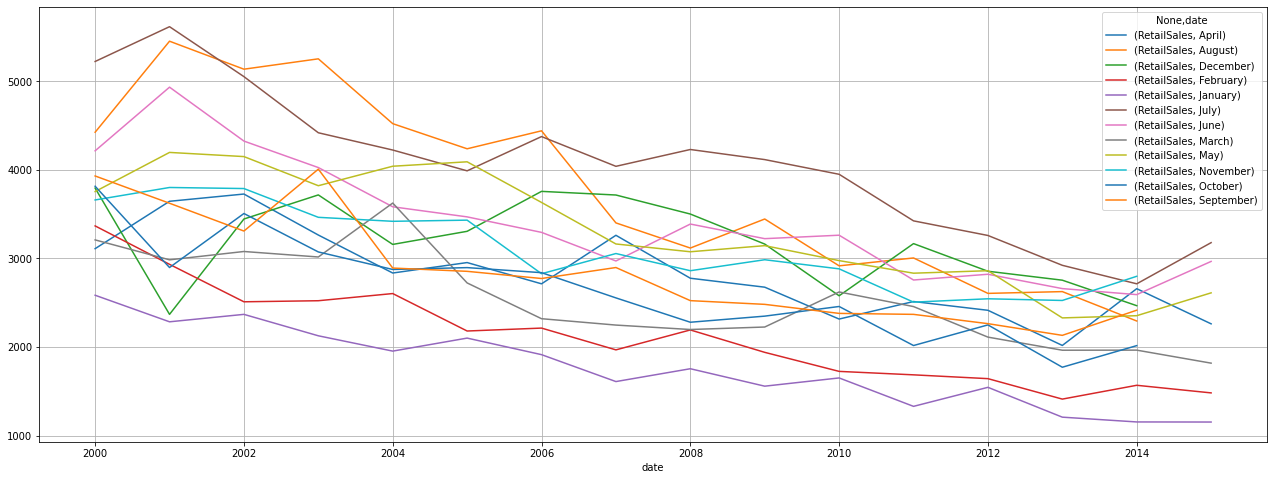

In [11]:
fig,ax=plt.subplots(figsize=(22,8))
sales_pivot.plot(ax=ax)
plt.grid()
plt.show();

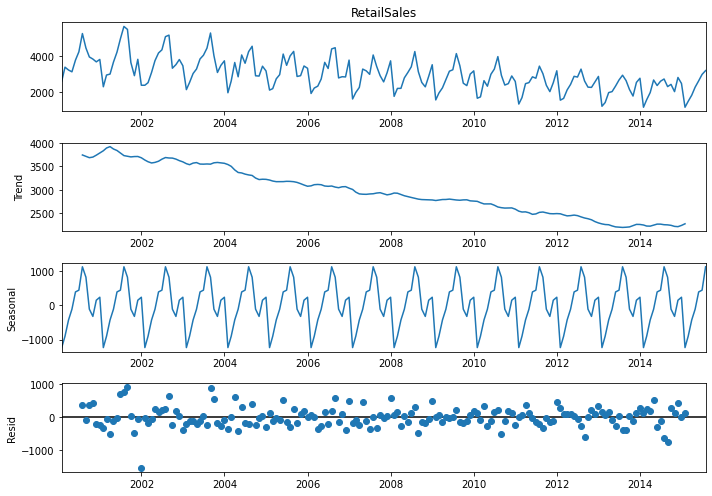

In [12]:
sales_sd=seasonal_decompose(sales.RetailSales,model='additive')
sales_sd.plot();

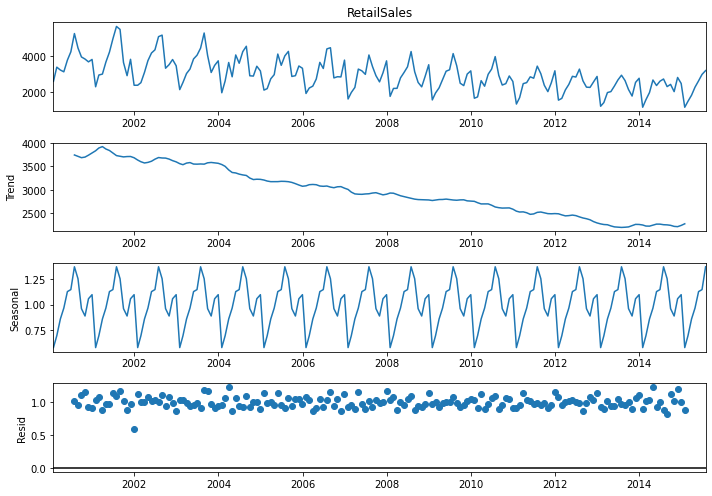

In [14]:
sales_sd=seasonal_decompose(sales.RetailSales,model='multiplicative')
sales_sd.plot();

In [13]:
train, test = sales[:int(len(sales)*0.7)],sales[int(len(sales)*0.7):]
train.shape,test.shape

((130, 1), (57, 1))

# KPSS vs ADFULLER

> A major difference between KPSS and ADF tests is the capability of the KPSS test to check for stationarity in the ‘presence of a deterministic trend’.
* If you go back and read the definition of the KPSS test, it tests for stationarity of the series around a ‘deterministic trend’.
What that effectively means to us is, the test may not necessarily reject the null hypothesis (that the series is stationary) even if a series is steadily increasing or decreasing.

> But what is a ‘deterministic trend’?
* The word ‘deterministic’ implies the slope of the trend in the series does not change permanently. That is, even if the series goes through a shock, it tends to regain its original path.

* If a series is stationary according to the KPSS test by setting regression='ct' and is not stationary according to the ADF test, it means the series is stationary around a deterministic trend and so is fairly easy to model this series and produce fairly accurate forecasts.

In [71]:
sales_adfuller_test = adfuller(sales.RetailSales.values, autolag='AIC')
sales_adfuller_test

(-0.907380399588585,
 0.7855322305097692,
 11,
 175,
 {'1%': -3.4682803641749267,
  '5%': -2.8782017240816327,
  '10%': -2.5756525795918366},
 2494.073344412101)

In [70]:
sales_kpss_test = kpss(sales.RetailSales.values, regression='ct', nlags='auto')
sales_kpss_test

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.017500747837470763,
 0.1,
 3,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [73]:
train_adfuller_test = adfuller(train.RetailSales.values, autolag='AIC')
train_adfuller_test

(-0.47651349523284947,
 0.8965188160672122,
 11,
 118,
 {'1%': -3.4870216863700767,
  '5%': -2.8863625166643136,
  '10%': -2.580009026141913},
 1721.9384387267262)

In [74]:
train_kpss_test = kpss(train.RetailSales.values, regression='ct', nlags='auto')
train_kpss_test

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.01909882517157907,
 0.1,
 4,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [61]:
sales_adfuller_test = adfuller(sales.diff().dropna())
sales_adfuller_test

(-23.500036467067464,
 0.0,
 10,
 175,
 {'1%': -3.4682803641749267,
  '5%': -2.8782017240816327,
  '10%': -2.5756525795918366},
 2477.0525258597545)

In [62]:
sales_adfuller_test = adfuller(train)
sales_adfuller_test

(-0.3807882809985036,
 0.9132573679129725,
 11,
 120,
 {'1%': -3.486055829282407,
  '5%': -2.8859430324074076,
  '10%': -2.5797850694444446},
 1750.0528986749437)

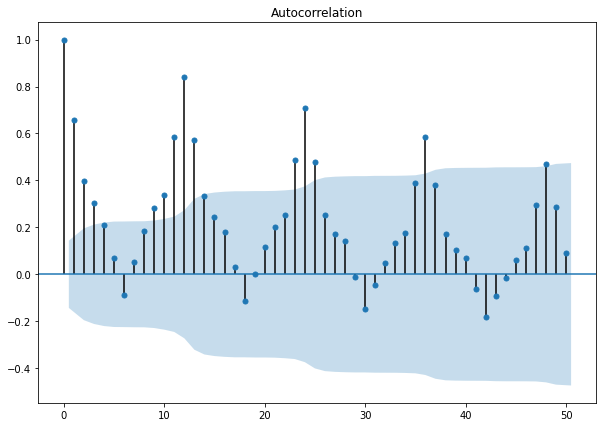

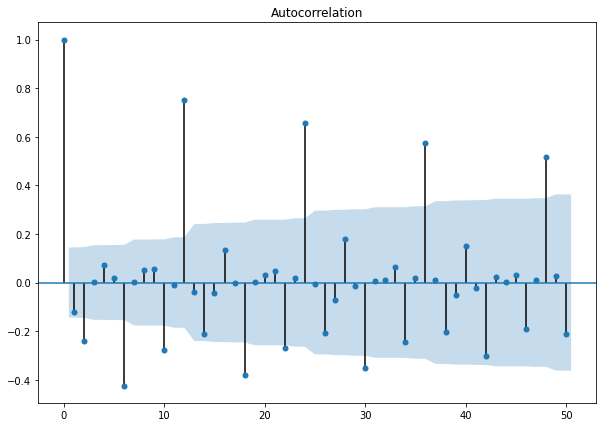

In [52]:
plot_acf(sales, lags=50);
plot_acf(sales.diff().dropna(), lags=50);

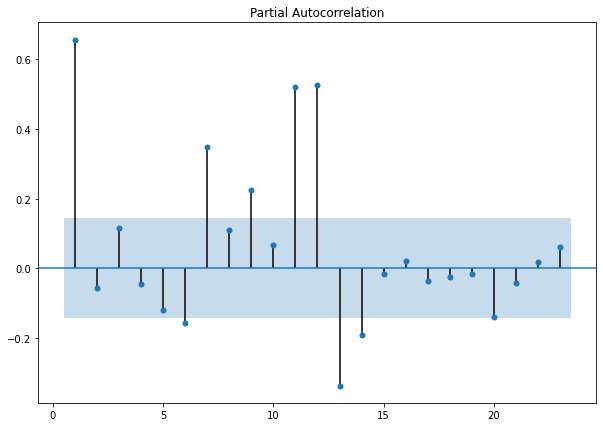

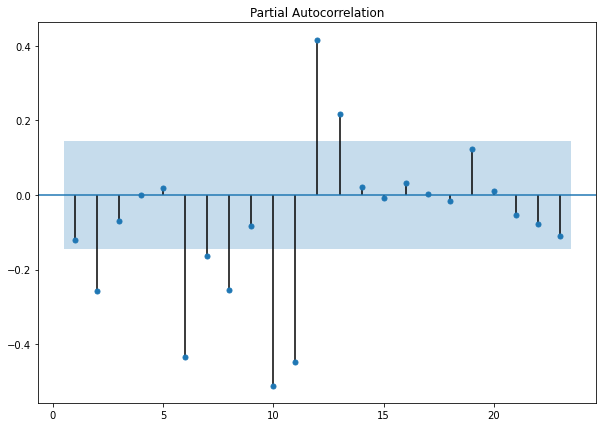

In [53]:
plot_pacf(sales,zero=False,method='ywmle');
plot_pacf(sales.diff().dropna(),zero=False,method='ywmle');

In [78]:
#p,d,q=1,0,3
p=q=range(0,3)
d=range(0,1)
pdq=list(itertools.product(p, d, q))
for i in range(len(pdq)):
  print(f'model-{pdq[i]}')

model-(0, 0, 0)
model-(0, 0, 1)
model-(0, 0, 2)
model-(1, 0, 0)
model-(1, 0, 1)
model-(1, 0, 2)
model-(2, 0, 0)
model-(2, 0, 1)
model-(2, 0, 2)


In [83]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [84]:
for param in tqdm(pdq):
  ARIMA_sales=ARIMA(train.RetailSales.values,order=param,
                    enforce_stationarity=False,
                    enforce_invertibility=False).fit()
  print(f'ARIMA{param} - AIC{ARIMA_sales.aic}')
  ARIMA_AIC=ARIMA_AIC.append({'param':param,'AIC':ARIMA_sales.aic},
                   ignore_index=True)

 22%|██▏       | 2/9 [00:00<00:00,  9.95it/s]

ARIMA(0, 0, 0) - AIC2111.818657012939
ARIMA(0, 0, 1) - AIC2050.591283915929


 33%|███▎      | 3/9 [00:00<00:00,  8.18it/s]

ARIMA(0, 0, 2) - AIC2032.9055104381227
ARIMA(1, 0, 0) - AIC2060.1552028090555
ARIMA(1, 0, 1) - AIC2045.2463421894881
ARIMA(1, 0, 2) - AIC2032.1406997338738


 89%|████████▉ | 8/9 [00:00<00:00, 12.32it/s]

ARIMA(2, 0, 0) - AIC2045.4623021825064
ARIMA(2, 0, 1) - AIC2045.9705112409015


100%|██████████| 9/9 [00:00<00:00,  9.34it/s]

ARIMA(2, 0, 2) - AIC2032.2255645382609


In [86]:
ARIMA_AIC.sort_values(by='AIC').head()

,param,AIC
5,"(1, 0, 2)",2032.140700
8,"(2, 0, 2)",2032.225565
2,"(0, 0, 2)",2032.905510
4,"(1, 0, 1)",2045.246342
6,"(2, 0, 0)",2045.462302


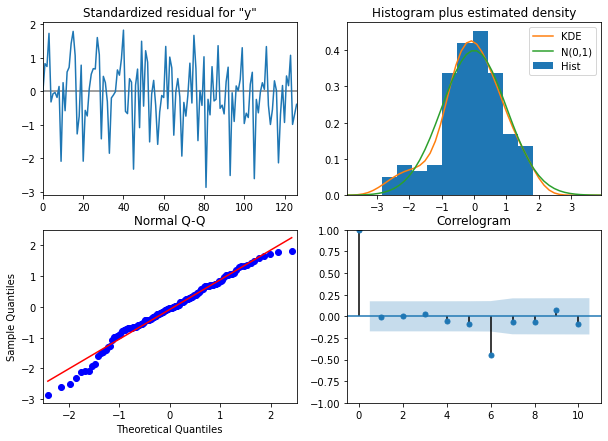

In [88]:
ARIMA_sales.plot_diagnostics();

In [89]:
print(ARIMA_sales.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  130
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1010.113
Date:                Wed, 01 Feb 2023   AIC                           2032.226
Time:                        22:16:30   BIC                           2049.291
Sample:                             0   HQIC                          2039.159
                                - 130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3234.1764    783.834      4.126      0.000    1697.891    4770.462
ar.L1          1.3079      0.240      5.440      0.000       0.837       1.779
ar.L2         -0.3291      0.210     -1.568      0.1

In [116]:
sales_model = ARIMA(train.RetailSales.values,order=(1,0,3),
                    enforce_stationarity=False,
                    enforce_invertibility=False).fit()
sales_pred = sales_model.forecast(steps=len(test))
sales_rmse = mean_squared_error(test.RetailSales.values,
                                sales_pred,squared=False)

In [117]:
sales_rmse

1033.7171356499905

In [118]:
test['forecast']=sales_pred

<ipython-input-118-8be292d6f32f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['forecast']=sales_pred


In [119]:
test.head()

,RetailSales,forecast
date,,
2010-11-30,2883,2581.399629
2010-12-31,2579,2824.841750
2011-01-31,1330,2938.746582
2011-02-28,1686,3110.758553
2011-03-31,2457,3182.617915


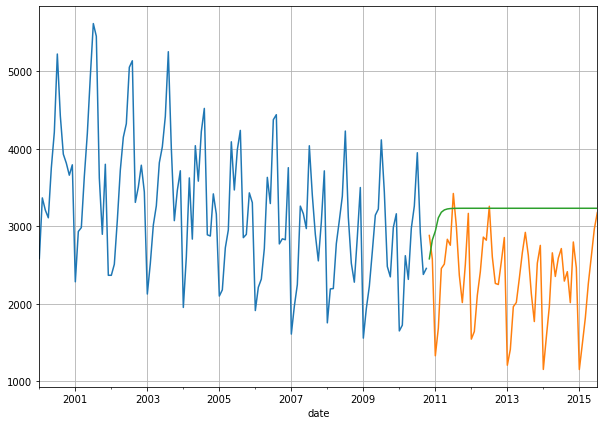

In [120]:
train.RetailSales.plot()
test.RetailSales.plot()
test.forecast.plot()
plt.grid()
plt.show();